In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

In [2]:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


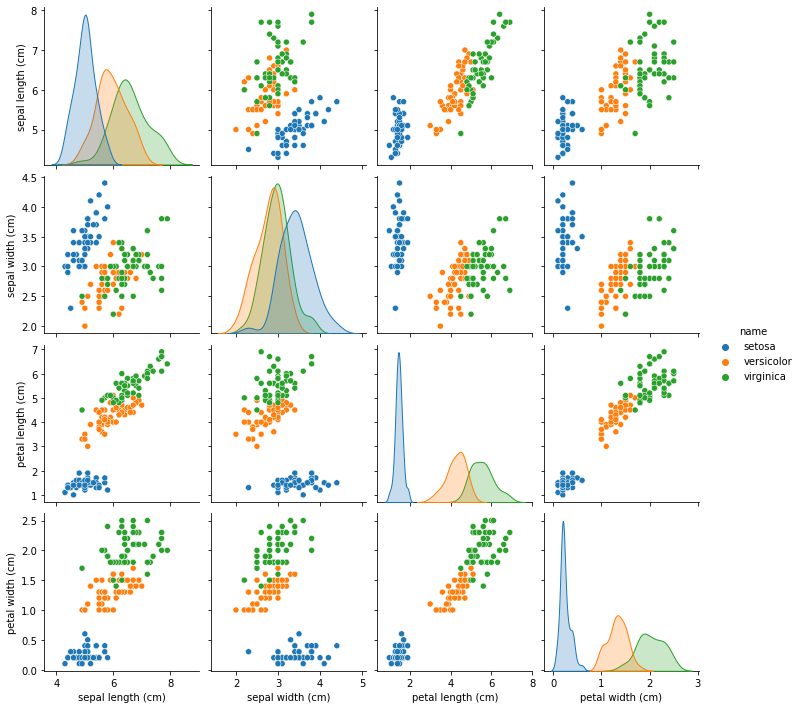

In [3]:
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
    iris_frame['target'], test_size = 0.3, shuffle=True)

In [5]:
train_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
119,6.0,2.2,5.0,1.5
44,5.1,3.8,1.9,0.4
126,6.2,2.8,4.8,1.8
135,7.7,3.0,6.1,2.3
6,4.6,3.4,1.4,0.3
...,...,...,...,...
62,6.0,2.2,4.0,1.0
42,4.4,3.2,1.3,0.2
61,5.9,3.0,4.2,1.5
47,4.6,3.2,1.4,0.2


In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from svm import SVM

In [8]:
clf = SVM(C=0.1, max_iter=1000)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print(accuracy_score(test_labels, pred))

0.9777777777777777


In [9]:
from kernels import Poly
poly = Poly(degree=2)
clf = SVM(C=0.1, kernel=poly, max_iter=1000)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print(accuracy_score(test_labels, pred))

0.8444444444444444


In [10]:
from kernels import RBF
rbf = RBF()
clf = SVM(C=0.1, kernel=rbf, max_iter=1000)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print(accuracy_score(test_labels, pred))

0.8666666666666667
